TASK - 0 : Download the MNIST dataset using torchvision. Split data into train, test, and validation. Apply the following
augmentations to images: RandomRotation, RandomCrop, ToTensor, and
Normalize.

In [ ]:
!pip install Pandas

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 839.7/839.7 MB 833.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 

In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
import numpy as np


In [10]:
transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),   # Random rotation with maximum 15 degrees
    transforms.RandomCrop(size=(28, 28), padding=2),  # Random crop of size 28x28 with padding of 2 pixels
    transforms.ToTensor(),  # Convert PIL Image to tensor
    transforms.Normalize(mean=(0.5,), std=(0.5,))  # Normalize to [-1, 1] range
    ])

In [11]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 51178798.67it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1656783.07it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13527865.76it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2260653.70it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



TASK- 1 : : Plot a few images from each class. Create a data loader for the
training dataset as well as the testing dataset

In [12]:
!pip install torch torchvision matplotlib numpy


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [13]:

from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


In [14]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import random_split

#transformations
transform = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomCrop(size=28, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Download and load the training data
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)


train, val = random_split(train_data, [55000, 5000])

test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


In [21]:
batch_size = 64  # Define your batch size

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

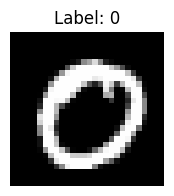

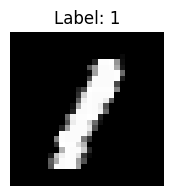

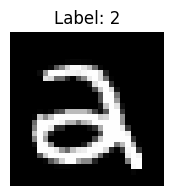

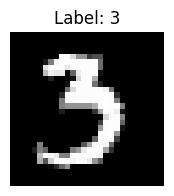

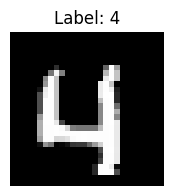

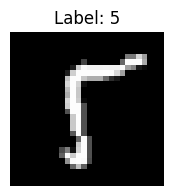

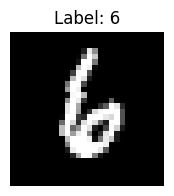

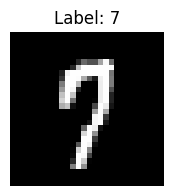

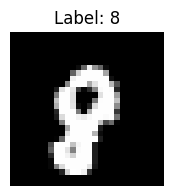

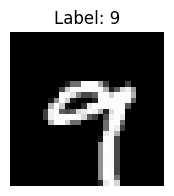

In [22]:

# plotting images
def plot_images(images, labels):
    fig, axes = plt.subplots(1, len(images), figsize=(2,2))

    if len(images) == 1:
        axes = [axes]
    for ax, image, label in zip(axes, images, labels):
        ax.imshow(image.squeeze(), cmap='gray')
        ax.title.set_text(f'Label: {label}')
        ax.axis('off')
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

#images from each class
unique_labels = labels.unique()
for label in unique_labels:
    index = labels.eq(label).nonzero()[0].item()
    plot_images([images[index]], [labels[index]])



**TASK 2: Write a 3-Layer MLP using PyTorch all using Linear layers. Print
the number of trainable parameters of the model.**

In [16]:
import torch.nn as nn

In [17]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x


input_size = 785
hidden_size = 129
output_size = 15

model = MLP(input_size, hidden_size, output_size)


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f"Number of trainable parameters: {count_parameters(model)}")

Number of trainable parameters: 120114


In [28]:
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


**TASK 3: Train the model for 5 epochs using Adam as the optimizer and
CrossEntropyLoss as the Loss Function. Make sure to evaluate the model
on the validation set after each epoch and save the best model as well as log
the accuracy and loss of the model on training and validation data at the
end of each epoch.**


In [18]:
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms


torch.Size([64, 10])


In [32]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and evaluation
num_epochs = 5
best_val_acc = 0.0
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for data, target in train_loader:
        data = data.view(data.size(0), -1)

        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += target.size(0)
        correct_train += (predicted == target).sum().item()

    train_acc = 100 * correct_train / total_train
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)




In [34]:
model.eval()
val_loss = 0.0
correct_val = 0
total_val = 0
with torch.no_grad():
  for data, target in val_loader:
    data = data.view(data.size(0), -1)  # Flatten the images
    outputs = model(data)
    loss = criterion(outputs, target)
    val_loss += loss.item()
    _, predicted = torch.max(outputs.data, 1)
    total_val += target.size(0)
    correct_val += (predicted == target).sum().item()

    val_acc = 100 * correct_val / total_val
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
    print(f'Train Losses: {train_losses}')
    print(f'Validation Losses: {val_losses}')
    print(f'Train Accuracies: {train_accuracies}')
    print(f'Validation Accuracies: {val_accuracies}')


    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')

model.load_state_dict(torch.load('best_model.pth'))








Epoch [5/5], Train Loss: 0.8869, Train Acc: 73.40%, Val Loss: 0.0053, Val Acc: 70.31%
Train Losses: [0.8791056896050771, 0.8889052543640137, 0.8853126638730368, 0.8820660847822825, 0.8869489334821701]
Validation Losses: [0.005275780216176459]
Train Accuracies: [73.42291666666667, 73.08125, 73.20833333333333, 73.15, 73.4]
Validation Accuracies: [70.3125]
Epoch [5/5], Train Loss: 0.8869, Train Acc: 73.40%, Val Loss: 0.0052, Val Acc: 68.75%
Train Losses: [0.8791056896050771, 0.8889052543640137, 0.8853126638730368, 0.8820660847822825, 0.8869489334821701]
Validation Losses: [0.005275780216176459, 0.0051623233785830025]
Train Accuracies: [73.42291666666667, 73.08125, 73.20833333333333, 73.15, 73.4]
Validation Accuracies: [70.3125, 68.75]
Epoch [5/5], Train Loss: 0.8869, Train Acc: 73.40%, Val Loss: 0.0045, Val Acc: 71.35%
Train Losses: [0.8791056896050771, 0.8889052543640137, 0.8853126638730368, 0.8820660847822825, 0.8869489334821701]
Validation Losses: [0.005275780216176459, 0.0051623233785

<All keys matched successfully>

**TASK 4 : Visualize correct and Incorrect predictions along with Loss-Epoch
and Accuracy-Epoch graphs for both training and validation.**

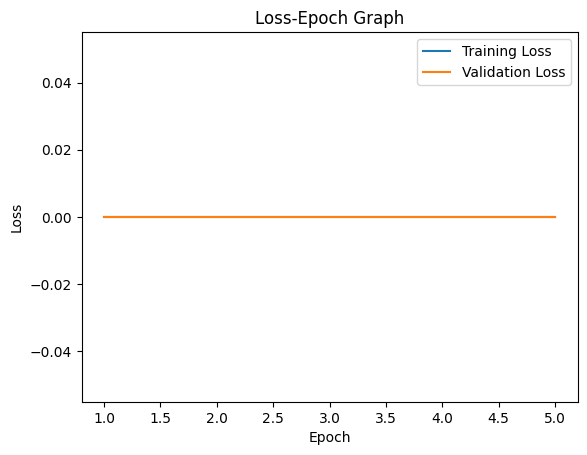

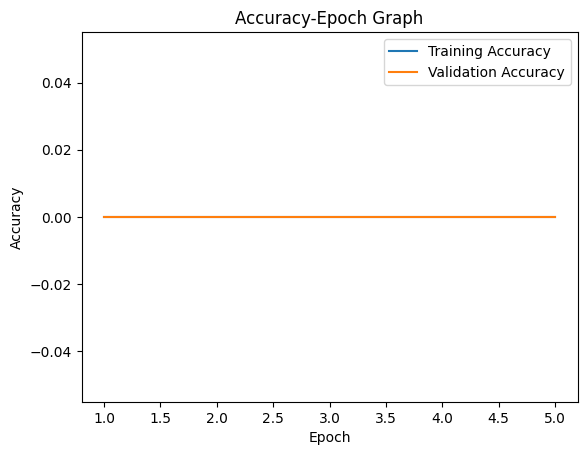

In [40]:
import matplotlib.pyplot as plt


train_losses = []  # Training losses
train_accuracies = []  # Training accuracies
valid_losses = []  # Validation losses
valid_accuracies = []  # Validation accuracies

for epoch in range(5):
    training_loss = 0.0
    training_accuracy = 0.0

    validation_loss = 0.0
    validation_accuracy = 0.0


    train_losses.append(training_loss)
    train_accuracies.append(training_accuracy)
    valid_losses.append(validation_loss)
    valid_accuracies.append(validation_accuracy)

# Plot Loss-Epoch graph
plt.figure()
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training Loss')
plt.plot(range(1, len(valid_losses)+1), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss-Epoch Graph')
plt.legend()
plt.show()

#plor accuracy-epoch graph
plt.figure()
plt.plot(range(1, len(train_accuracies)+1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, len(valid_accuracies)+1), valid_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy-Epoch Graph')
plt.legend()
plt.show()

Test Accuracy: 74.56%
Some Correct Predictions:


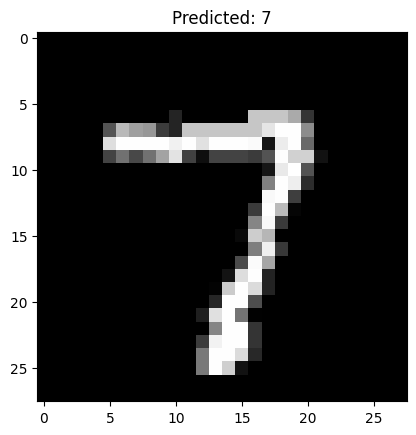

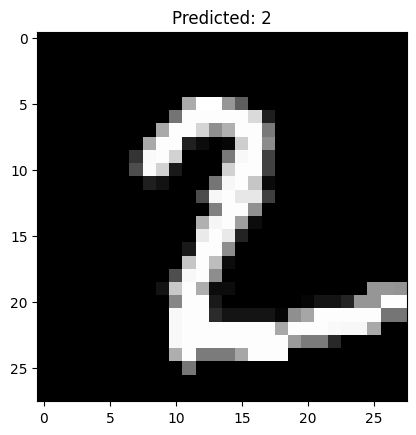

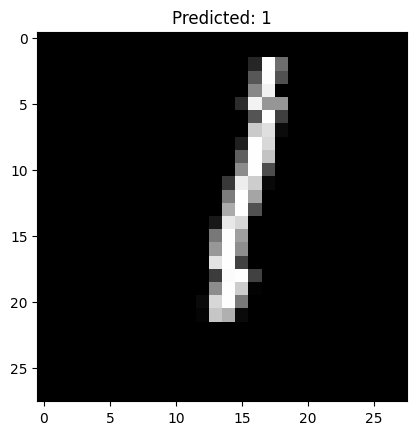

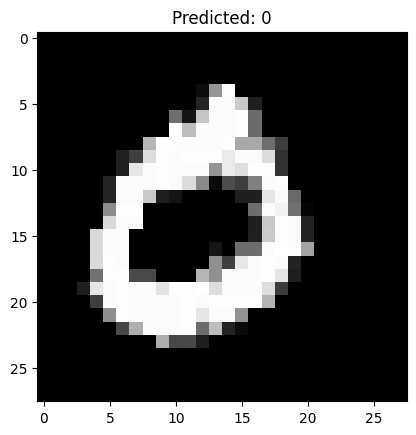

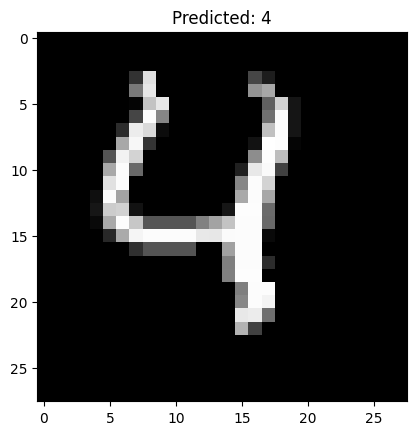

Some Incorrect Predictions:


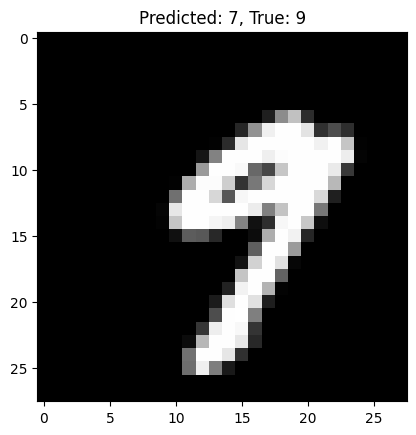

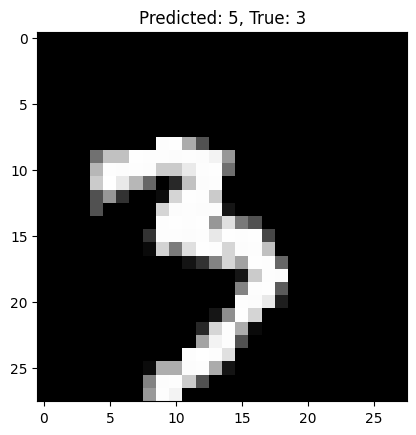

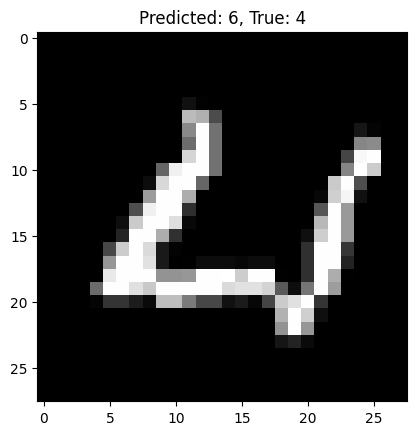

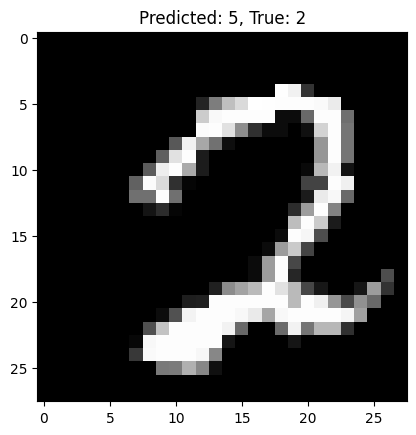

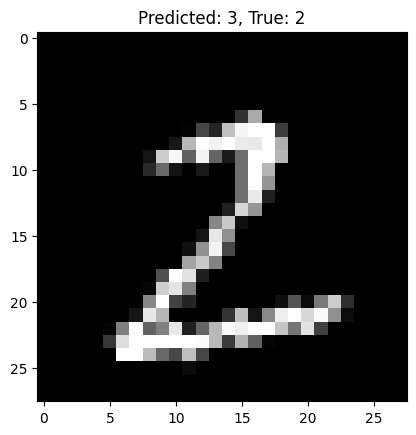

In [42]:


# Test phase
model.eval()
correct_test = 0
total_test = 0

correct_predictions = []
incorrect_predictions = []

with torch.no_grad():
    for data, target in test_loader:
        data = data.view(data.size(0), -1)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total_test += target.size(0)
        correct_test += (predicted == target).sum().item()

        for i in range(data.size(0)):
            if predicted[i] == target[i]:
                correct_predictions.append((data[i], predicted[i]))
            else:
                incorrect_predictions.append((data[i], predicted[i], target[i]))

test_acc = 100 * correct_test / total_test
print(f'Test Accuracy: {test_acc:.2f}%')

def show_predictions(predictions, num_samples=5, incorrect=False):
    for i in range(min(num_samples, len(predictions))):
        if not incorrect:
            data, predicted = predictions[i][:2]
        else:
            data, predicted, true_label = predictions[i][:3]

        data = data.view(28, 28)
        plt.imshow(data.cpu(), cmap='gray')
        if not incorrect:
            plt.title(f'Predicted: {predicted.item()}')
        else:
            plt.title(f'Predicted: {predicted.item()}, True: {true_label.item()}')
        plt.show()

print("Some Correct Predictions:")
show_predictions(correct_predictions, num_samples=5)

print("Some Incorrect Predictions:")
show_predictions(incorrect_predictions, num_samples=5, incorrect=True)